# **Marketing Funnel & Conversion Performance Analysis**

------

## **Problem Statement**
Marketing funnels help businesses understand how potential customers move from lead generation to final deal closure.
Identifying drop-offs and optimizing conversion rates is critical for improving marketing effectiveness and return on investment.

----

## **Project Objective**
Analyze marketing funnel data to measure lead-to-deal conversion rates, evaluate channel performance, and identify opportunities to improve overall conversion efficiency.

----

## **Dataset Description**
This project uses two datasets from Olist's marketing funnel process:

1. Marketing Qualified Leads Dataset – Contains information about generated leads and their marketing sources.
2. Closed Deals Dataset – Contains information about leads that were successfully converted into closed deals.

By combining these datasets, we can analyze funnel performance from lead generation to deal closure.

---

## **Tools Used**
- Python
- Pandas
- Matplotlib
- Seaborn
- Google Colab

---


## Codebook

### **File 1: Marketing_Qualified_Leads.csv**

| Column Name | Description |
|-------------|-------------|
| mql_id | Unique Marketing Qualified Lead identifier |
| first_contact_date | Date when the lead first contacted the company |
| landing_page_id | Landing page where lead was generated |
| origin | Lead acquisition source (e.g., paid search, organic, social) |

---

### **File 2: Closed_Deals.csv**

| Column Name | Description |
|-------------|-------------|
| mql_id | Marketing Qualified Lead identifier |
| seller_id | Seller assigned to the lead |
| sdr_id | Sales Development Representative ID |
| sr_id | Sales Representative ID |
| won_date | Date the deal was closed |
| business_segment | Business category of the deal |
| lead_type | Type of lead |
| declared_monthly_revenue | Reported monthly revenue of the lead |

In [1]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [8]:
# Load datasets
df_leads = pd.read_csv("Marketing_Qualified_Leads.csv")
df_leads.head()

,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search


In [7]:
df_leads.shape

(8000, 4)

In [9]:
df_deals = pd.read_csv("Closed_Deals.csv")

df_leads.head()

,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search


In [5]:
df_deals.shape

(842, 14)

## Funnel Overview

Calculating total marketing qualified leads, total closed deals, and overall conversion rate.

In [10]:
total_leads = df_leads['mql_id'].nunique()
total_closed_deals = df_deals['mql_id'].nunique()

conversion_rate = (total_closed_deals / total_leads) * 100

print(f"Total Marketing Qualified Leads: {total_leads}")
print(f"Total Closed Deals: {total_closed_deals}")
print(f"Overall Conversion Rate: {conversion_rate:.2f}%")

Total Marketing Qualified Leads: 8000
Total Closed Deals: 842
Overall Conversion Rate: 10.53%


## Funnel Drop-Off Analysis

In [11]:
drop_off_rate = 100 - conversion_rate

print(f"Drop-Off Rate: {drop_off_rate:.2f}%")

Drop-Off Rate: 89.47%


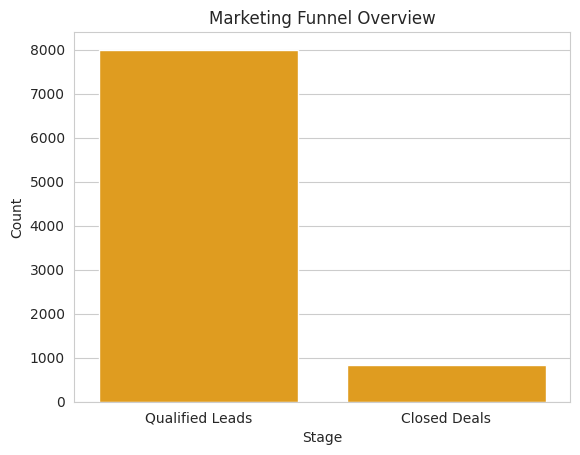

In [13]:
funnel_data = pd.DataFrame({
    "Stage": ["Qualified Leads", "Closed Deals"],
    "Count": [total_leads, total_closed_deals]
})

sns.barplot(data=funnel_data, x="Stage", y="Count", color = 'orange')
plt.title("Marketing Funnel Overview")
plt.show()

In [14]:
#merge datasets

df_merged = df_leads.merge(df_deals[['mql_id']],
                           on='mql_id',
                           how='left',
                           indicator=True)

df_merged['Converted'] = df_merged['_merge'].map({
    'both': 1,
    'left_only': 0
})

## Conversion Rate by Lead Source

In [15]:
source_conversion = df_merged.groupby('origin')['Converted'].mean() * 100
source_conversion = source_conversion.sort_values(ascending=False)

source_conversion

,Converted
origin,
unknown,16.287534
paid_search,12.295082
organic_search,11.803136
direct_traffic,11.222445
referral,8.450704
social,5.555556
display,5.084746
other_publicities,4.615385
email,3.042596


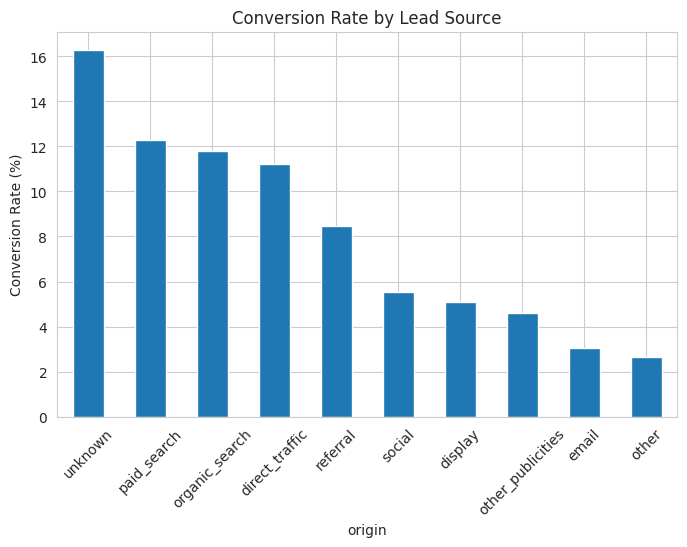

In [16]:
plt.figure(figsize=(8,5))
source_conversion.plot(kind='bar')
plt.ylabel("Conversion Rate (%)")
plt.title("Conversion Rate by Lead Source")
plt.xticks(rotation=45)
plt.show()

## Closed Deals by Business Segment

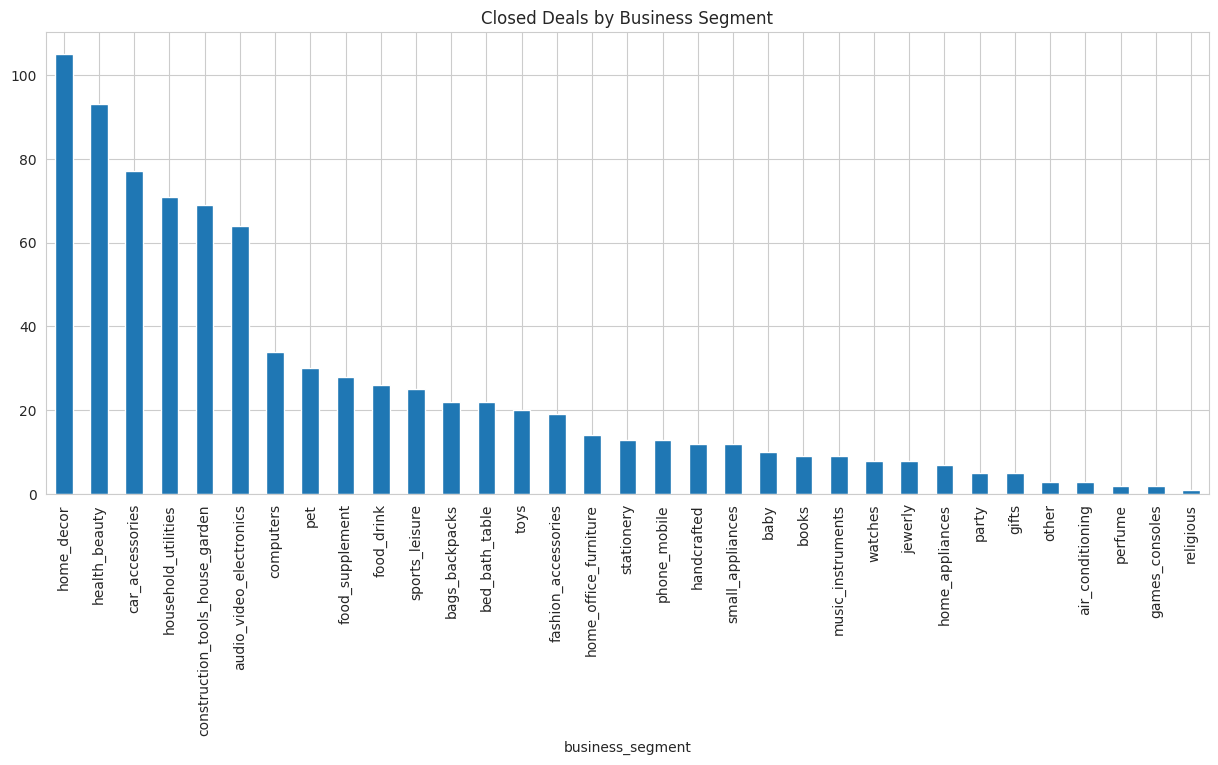

In [20]:
segment_analysis = df_deals['business_segment'].value_counts()

plt.figure(figsize=(15,6))
segment_analysis.plot(kind='bar')
plt.title("Closed Deals by Business Segment")
plt.show()

In [21]:
df_deals['declared_monthly_revenue'].describe()

,declared_monthly_revenue
count,8.420000e+02
mean,7.337768e+04
std,1.744799e+06
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,5.000000e+07


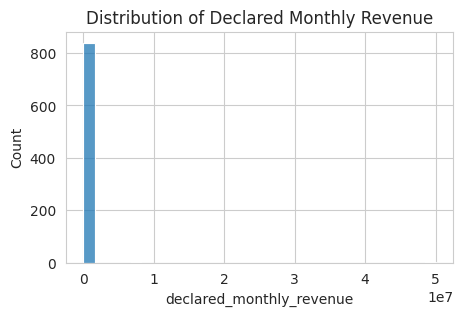

In [23]:
plt.figure(figsize=(5,3))
sns.histplot(df_deals['declared_monthly_revenue'], bins=30)
plt.title("Distribution of Declared Monthly Revenue")
plt.show()

**# Key Insights**

1. Only a fraction of marketing qualified leads convert into closed deals, indicating significant funnel drop-off.
2. Certain lead origins demonstrate higher conversion rates than others.
3. Business segments differ in their contribution to total closed deals.
4. High-value revenue segments can be identified among converted leads.

-----


**# Strategic Recommendations**

- Allocate more marketing budget to high-converting lead sources.
- Improve engagement strategies for low-converting channels.
- Optimize follow-up processes during early funnel stages.
- Focus sales efforts on high-revenue business segments.

----


**# Conclusion**

This analysis highlights funnel efficiency, channel performance, and revenue opportunities. Optimizing high-performing sources and reducing drop-offs can significantly enhance marketing ROI and sales performance.

----